# Gather, Assess, Clean WeRateDogs Data
Before beginning, import the following packages:
- Pandas
- NumPy
- Requests
- Tweepy
- JSON
- Matplotlib
- Seaborn

In [1]:
#import packages
import pandas as pd
import numpy as  np
import requests
import json
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns

# display plots inline
%matplotlib inline

## Gather
### Tweet Archive
I have been provided the file. Read the file to a DataFrame.

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

### Image Predictions
I have been provided a URL for the file. Use the `get()` function from the Requests library to get the file and read it to a DataFrame

In [3]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

# Read in tsv file as a Pandas DataFrame    
predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')

### Tweet Information DataFrame
Use the Tweepy API to access Twitter and collect information on the tweets. Save the data to `tweet_json.txt`.

Set up the Tweepy API for use. Do not share `consumer_key`, `consumer_secret`, `access_token`, or `access_secret` in the version that is handed in. Get tweet data using Tweepy. 

In [9]:
consumer_key = 'XXXXX'
consumer_secret = 'XXXXX'
access_token = 'XXXXX'
access_secret = 'XXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

tweet_data = {}
for tweet in list(archive_df.tweet_id):
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 872261713294495745
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 845459076796616705
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 775096608509886464
Error for: 770743923962707968


Rate limit reached. Sleeping for: 509


Error for: 754011816964026368
Error for: 680055455951884288


Rate limit reached. Sleeping for: 507


Write tweet data to `tweet_json.txt`.

In [11]:
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = True)

Create `info_df` DataFrame from `tweet_json.txt`

In [4]:
info_df = pd.read_json('tweet_json.txt',orient='index')

## Assess
### Tweet Archive Data-frame
Show `info()` and the first 5 rows of the Tweet Archive DataFrame.

In [5]:
archive_df.info()
display(archive_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Image Preditions Data-frame
Show `info()` and the first 5 rows of the Image Predictions DataFrame.

In [6]:
predictions_df.info()
display(predictions_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Tweet Information DataFrame
Show `info()` and the first 5 rows of the Tweet Information DataFrame.

In [7]:
info_df.info()
display(info_df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2339 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2339 non-null datetime64[ns]
entities                         2339 non-null object
extended_entities                1821 non-null object
favorite_count                   2339 non-null int64
favorited                        2339 non-null int64
geo                              0 non-null float64
id                               2339 non-null int64
id_str                           2339 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2519,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,497,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,125,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,46,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,121,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,43,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,290,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,136,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,105,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,42,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


## Clean
First, use `copy()` to create copies to clean:

In [18]:
archive_df_clean = archive_df.copy()
predictions_df_clean = predictions_df.copy()
info_df_clean = info_df.copy()

### Tidiness

Next, I will address tidiness. Here are the requirements of tidy data.

#### Requirements of tidy data

(https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html)

- Each variable forms a column.
- Each observation forms a row.
- Each type of observational unit forms a table.

Here are some tidiness issues I observed in the DataFrames above.

#### Data tidiness issues

- There are unnecessary columns and duplicated rows
- Four dog stage columns should be one column
- Three DataFrames can be combined into one

#### Define
Use `copy()` to keep only the columns I am interested in from `info_df`. Use `rename()` to rename the `id` column to `tweet_id` to match the other DataFrames.
#### Code

In [19]:
info_df_clean = info_df_clean[['id', 'favorite_count', 'retweet_count']].copy()
info_df_clean.reset_index(drop=True, inplace=True)
info_df_clean.rename(indeIx=str, columns={'id': "tweet_id"}, inplace=True)

#### Test

In [20]:
info_df_clean.head()

,tweet_id,favorite_count,retweet_count
0,666020888022790144,2519,497
1,666029285002620928,125,46
2,666033412701032448,121,43
3,666044226329800704,290,136
4,666049248165822464,105,42


#### Define
Use `drop()` to drop the columns I do not want from `archive_df`.
#### Code

In [21]:
archive_df_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id',
                               'retweeted_status_id', 'retweeted_status_user_id',
                              'retweeted_status_timestamp', 'source', 'expanded_urls'], index=1, inplace=True)

#### Test

In [22]:
archive_df_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,None,None,None,None,None


#### Define
Dog stage should be one, not four, columns. Use `loc` to locate dog stages and put them in one column called `dog_stage`.
#### Code

In [23]:
archive_df_clean.loc[archive_df_clean['doggo'] == 'doggo', 'dog_stage'] = 'doggo'
archive_df_clean.loc[archive_df_clean['floofer'] == 'floofer', 'dog_stage'] = 'floofer'
archive_df_clean.loc[archive_df_clean['pupper'] == 'pupper', 'dog_stage'] = 'pupper'
archive_df_clean.loc[archive_df_clean['puppo'] == 'puppo', 'dog_stage'] = 'puppo'

archive_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace=True)

#### Test

In [24]:
archive_df_clean.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
1813,676776431406465024,2015-12-15 14:50:49 +0000,"When someone yells ""cops!"" at a party and you ...",10,10,None,NaN
507,812709060537683968,2016-12-24 17:18:34 +0000,This is Brandi and Harley. They are practicing...,12,10,Brandi,NaN
909,757725642876129280,2016-07-25 23:54:05 +0000,This is Beckham. He fell asleep at the wheel. ...,11,10,Beckham,NaN
1504,691820333922455552,2016-01-26 03:09:55 +0000,This is Brockly. He's an uber driver. Falls as...,8,10,Brockly,NaN
198,854365224396361728,2017-04-18 16:05:17 +0000,This is Einstein. He's having a really good da...,13,10,Einstein,NaN
1079,739238157791694849,2016-06-04 23:31:25 +0000,Here's a doggo blowing bubbles. It's downright...,13,10,None,doggo
159,860981674716409858,2017-05-06 22:16:42 +0000,RT @dog_rates: Meet Lorenzo. He's an avid nift...,13,10,Lorenzo,NaN
1770,678341075375947776,2015-12-19 22:28:09 +0000,This pupper likes tape. 12/10 https://t.co/cSp...,12,10,None,pupper
27,886736880519319552,2017-07-16 23:58:41 +0000,This is Mingus. He's a wonderful father to his...,13,10,Mingus,NaN
270,841314665196081154,2017-03-13 15:47:01 +0000,This is Max. There's no way in h*ck you're tak...,13,10,Max,NaN


#### Define
Create a new DataFrame called `tweets_df` by left joining `archive_df_clean`, `info_df_clean` using `merge()`. Then, use `merge()` to left join `predictions_df` to the new DataFrame, `tweets_df`.
#### Code

In [25]:
tweets_df = pd.merge(archive_df_clean, info_df_clean, on=['tweet_id','tweet_id'],how='left')
tweets_df = pd.merge(tweets_df, predictions_df_clean, on=['tweet_id','tweet_id'],how='left')

#### Test

In [26]:
tweets_df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,24391.0,4021.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,41037.0,8376.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
3,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,39229.0,9080.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
4,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,None,NaN,19719.0,3012.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


### Quality

#### Data quality issues

- tweet_id is an integer
- timestamp is a string
- not all tweets have images (jpg_url)
- some names are not names
- retweet and favorite counts are floats but can be counted as ints
- dog class is a string (can be categorical)
- img_num is a float (can be categorical)
- ratings numerators and denominators are ints but may be more useful for calculation as floats
- p1, p2, p3 are strings but can be booleans

#### Define
`tweet_id` is an integer, but it should be a string. Use `astype(str)` to change `tweet_id` to a string.  
#### Code

In [27]:
tweets_df['tweet_id'] = tweets_df['tweet_id'].astype(str)

#### Test

In [28]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2354
Data columns (total 20 columns):
tweet_id              2355 non-null object
timestamp             2355 non-null object
text                  2355 non-null object
rating_numerator      2355 non-null int64
rating_denominator    2355 non-null int64
name                  2355 non-null object
dog_stage             380 non-null object
favorite_count        1510 non-null float64
retweet_count         1510 non-null float64
jpg_url               2074 non-null object
img_num               2074 non-null float64
p1                    2074 non-null object
p1_conf               2074 non-null float64
p1_dog                2074 non-null object
p2                    2074 non-null object
p2_conf               2074 non-null float64
p2_dog                2074 non-null object
p3                    2074 non-null object
p3_conf               2074 non-null float64
p3_dog                2074 non-null object
dtypes: float64(6), int64(2), 

#### Define
`timestamp` is a string but can be a Datetime object. Use `to_datetime` to change `timestamp` to DateTime.
#### Code

In [29]:
tweets_df['timestamp'] = pd.to_datetime(tweets_df['timestamp'])

#### Test

In [30]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2354
Data columns (total 20 columns):
tweet_id              2355 non-null object
timestamp             2355 non-null datetime64[ns, UTC]
text                  2355 non-null object
rating_numerator      2355 non-null int64
rating_denominator    2355 non-null int64
name                  2355 non-null object
dog_stage             380 non-null object
favorite_count        1510 non-null float64
retweet_count         1510 non-null float64
jpg_url               2074 non-null object
img_num               2074 non-null float64
p1                    2074 non-null object
p1_conf               2074 non-null float64
p1_dog                2074 non-null object
p2                    2074 non-null object
p2_conf               2074 non-null float64
p2_dog                2074 non-null object
p3                    2074 non-null object
p3_conf               2074 non-null float64
p3_dog                2074 non-null object
dtypes: datetime6

#### Define
We only need tweets with images. Use `dropna` to drop rows with no `jpg_url`.  
#### Code

In [31]:
tweets_df = tweets_df.dropna(subset=['jpg_url'])

#### Test

In [32]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2354
Data columns (total 20 columns):
tweet_id              2074 non-null object
timestamp             2074 non-null datetime64[ns, UTC]
text                  2074 non-null object
rating_numerator      2074 non-null int64
rating_denominator    2074 non-null int64
name                  2074 non-null object
dog_stage             321 non-null object
favorite_count        1345 non-null float64
retweet_count         1345 non-null float64
jpg_url               2074 non-null object
img_num               2074 non-null float64
p1                    2074 non-null object
p1_conf               2074 non-null float64
p1_dog                2074 non-null object
p2                    2074 non-null object
p2_conf               2074 non-null float64
p2_dog                2074 non-null object
p3                    2074 non-null object
p3_conf               2074 non-null float64
p3_dog                2074 non-null object
dtypes: datetime6

#### Define
Not all `name`s are names. Find lowercase entries in the `names` column and use `np.nan` to replace those names with NaN. Replacce NaNs with the string 'None'.
#### Code

In [33]:
tweets_df.loc[tweets_df['name'] == tweets_df['name'].str.lower(), 'name'] = np.nan
tweets_df['name'].replace(np.nan, 'None', regex=True, inplace=True)

#### Test

In [34]:
tweets_df.info()
# count how many names are all lowercase
print("Lowercase count:")
print(tweets_df.loc[tweets_df['name'] == tweets_df['name'].str.lower(), 'name'].count())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2354
Data columns (total 20 columns):
tweet_id              2074 non-null object
timestamp             2074 non-null datetime64[ns, UTC]
text                  2074 non-null object
rating_numerator      2074 non-null int64
rating_denominator    2074 non-null int64
name                  2074 non-null object
dog_stage             321 non-null object
favorite_count        1345 non-null float64
retweet_count         1345 non-null float64
jpg_url               2074 non-null object
img_num               2074 non-null float64
p1                    2074 non-null object
p1_conf               2074 non-null float64
p1_dog                2074 non-null object
p2                    2074 non-null object
p2_conf               2074 non-null float64
p2_dog                2074 non-null object
p3                    2074 non-null object
p3_conf               2074 non-null float64
p3_dog                2074 non-null object
dtypes: datetime6

#### Define
`favorite_count` and `retweet_count` contain null values. If a tweet has not been favorited or retweeted, the favorite or retweet count can be considered 0. Replace null values with 0 using `fillna()`.

`favorite_count` and `retweet_count` are floats, the concept of a measuring retweets or favorites makes more sense to me as an integer measurement. Use `astype` to conver `favorite_count` and `retweet_count` to ints.
#### Code

In [35]:
tweets_df.favorite_count = tweets_df.favorite_count.fillna(0).astype(int)
tweets_df.retweet_count = tweets_df.retweet_count.fillna(0).astype(int)

tweets_df.favorite_count = tweets_df.favorite_count.astype(int)
tweets_df.retweet_count = tweets_df.retweet_count.astype(int)

#### Test

In [36]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2354
Data columns (total 20 columns):
tweet_id              2074 non-null object
timestamp             2074 non-null datetime64[ns, UTC]
text                  2074 non-null object
rating_numerator      2074 non-null int64
rating_denominator    2074 non-null int64
name                  2074 non-null object
dog_stage             321 non-null object
favorite_count        2074 non-null int32
retweet_count         2074 non-null int32
jpg_url               2074 non-null object
img_num               2074 non-null float64
p1                    2074 non-null object
p1_conf               2074 non-null float64
p1_dog                2074 non-null object
p2                    2074 non-null object
p2_conf               2074 non-null float64
p2_dog                2074 non-null object
p3                    2074 non-null object
p3_conf               2074 non-null float64
p3_dog                2074 non-null object
dtypes: datetime64[ns

#### Define
`dog_stage` contains null values. Replace null values with the string 'None' using `fillna()`.

`dog_stage` is a string; it should be a categorical variable. use `astype()` to change `dog_stage` to a categorical variable.
#### Code

In [37]:
tweets_df['dog_stage'].replace(np.nan, 'None', regex=True, inplace=True)
tweets_df.dog_stage = tweets_df.dog_stage.astype('category')

#### Test

In [38]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2354
Data columns (total 20 columns):
tweet_id              2074 non-null object
timestamp             2074 non-null datetime64[ns, UTC]
text                  2074 non-null object
rating_numerator      2074 non-null int64
rating_denominator    2074 non-null int64
name                  2074 non-null object
dog_stage             2074 non-null category
favorite_count        2074 non-null int32
retweet_count         2074 non-null int32
jpg_url               2074 non-null object
img_num               2074 non-null float64
p1                    2074 non-null object
p1_conf               2074 non-null float64
p1_dog                2074 non-null object
p2                    2074 non-null object
p2_conf               2074 non-null float64
p2_dog                2074 non-null object
p3                    2074 non-null object
p3_conf               2074 non-null float64
p3_dog                2074 non-null object
dtypes: category(1

#### Define
`rating_numerator` and `rating_denominator` are ints. According to the "rules" of *WeRateDogs*, anything goes; nothing is stopping anyone from submitting a rating with decimal numbers. In order to account for this quirk of the rating system, and to allow for calculations to be done as floats, use `astype(float)` to convert ratings to floats.
#### Code

In [39]:
tweets_df.rating_numerator = tweets_df.rating_numerator.astype(float)
tweets_df.rating_denominator = tweets_df.rating_denominator.astype(float)

#### Test

In [40]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2354
Data columns (total 20 columns):
tweet_id              2074 non-null object
timestamp             2074 non-null datetime64[ns, UTC]
text                  2074 non-null object
rating_numerator      2074 non-null float64
rating_denominator    2074 non-null float64
name                  2074 non-null object
dog_stage             2074 non-null category
favorite_count        2074 non-null int32
retweet_count         2074 non-null int32
jpg_url               2074 non-null object
img_num               2074 non-null float64
p1                    2074 non-null object
p1_conf               2074 non-null float64
p1_dog                2074 non-null object
p2                    2074 non-null object
p2_conf               2074 non-null float64
p2_dog                2074 non-null object
p3                    2074 non-null object
p3_conf               2074 non-null float64
p3_dog                2074 non-null object
dtypes: catego

#### Define
`img_num` is a number, but calculations on these numbers would be meaningless. The numbers refer to the category of image to which each observation belongs. Use `astype('category')` to change values to a categorial variable.
#### Code

In [41]:
tweets_df.img_num = tweets_df.img_num.astype('category')

#### Test

In [42]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2354
Data columns (total 20 columns):
tweet_id              2074 non-null object
timestamp             2074 non-null datetime64[ns, UTC]
text                  2074 non-null object
rating_numerator      2074 non-null float64
rating_denominator    2074 non-null float64
name                  2074 non-null object
dog_stage             2074 non-null category
favorite_count        2074 non-null int32
retweet_count         2074 non-null int32
jpg_url               2074 non-null object
img_num               2074 non-null category
p1                    2074 non-null object
p1_conf               2074 non-null float64
p1_dog                2074 non-null object
p2                    2074 non-null object
p2_conf               2074 non-null float64
p2_dog                2074 non-null object
p3                    2074 non-null object
p3_conf               2074 non-null float64
p3_dog                2074 non-null object
dtypes: categ

#### Define
`p1_dog`, `p2_dog`, and `p3_dog` are 'True', 'False' strings. Change to boolean using `astype('bool')`.
#### Code

In [43]:
tweets_df.p1_dog = tweets_df.p1_dog.astype('bool')
tweets_df.p2_dog = tweets_df.p2_dog.astype('bool')
tweets_df.p3_dog = tweets_df.p3_dog.astype('bool')

#### Test

In [44]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2354
Data columns (total 20 columns):
tweet_id              2074 non-null object
timestamp             2074 non-null datetime64[ns, UTC]
text                  2074 non-null object
rating_numerator      2074 non-null float64
rating_denominator    2074 non-null float64
name                  2074 non-null object
dog_stage             2074 non-null category
favorite_count        2074 non-null int32
retweet_count         2074 non-null int32
jpg_url               2074 non-null object
img_num               2074 non-null category
p1                    2074 non-null object
p1_conf               2074 non-null float64
p1_dog                2074 non-null bool
p2                    2074 non-null object
p2_conf               2074 non-null float64
p2_dog                2074 non-null bool
p3                    2074 non-null object
p3_conf               2074 non-null float64
p3_dog                2074 non-null bool
dtypes: bool(3), ca

Save `tweets_df` to `'tweet_master_archive.csv'`.

In [57]:
display(tweets_df.head())
tweets_df.to_csv('twitter_archive_master.csv')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,0,0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,24391,4021,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,41037,8376,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
3,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,39229,9080,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
4,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13.0,10.0,None,None,19719,3012,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


## Analyze
### Correlations
Use `corr()` to check for correlations between variables.

In [46]:
tweets_df.corr(method='pearson')

,rating_numerator,rating_denominator,favorite_count,retweet_count,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
rating_numerator,1.000000,0.198241,0.020965,0.024153,-0.009125,-0.028490,-0.020312,-0.033710,-0.003891,-0.028474
rating_denominator,0.198241,1.000000,-0.020523,-0.016562,-0.004363,0.001037,-0.034412,-0.000458,0.006829,0.005050
favorite_count,0.020965,-0.020523,1.000000,0.847670,0.052446,0.052386,0.007404,0.068812,-0.022917,0.053374
retweet_count,0.024153,-0.016562,0.847670,1.000000,0.033134,0.014496,0.007720,0.043263,-0.016239,0.021665
p1_conf,-0.009125,-0.004363,0.052446,0.033134,1.000000,0.119747,-0.511655,0.132925,-0.709544,0.110005
p1_dog,-0.028490,0.001037,0.052386,0.014496,0.119747,1.000000,0.112598,0.635171,0.048787,0.556358
p2_conf,-0.020312,-0.034412,0.007404,0.007720,-0.511655,0.112598,1.000000,0.100941,0.479088,0.067854
p2_dog,-0.033710,-0.000458,0.068812,0.043263,0.132925,0.635171,0.100941,1.000000,0.042859,0.550767
p3_conf,-0.003891,0.006829,-0.022917,-0.016239,-0.709544,0.048787,0.479088,0.042859,1.000000,0.041740
p3_dog,-0.028474,0.005050,0.053374,0.021665,0.110005,0.556358,0.067854,0.550767,0.041740,1.000000


The largest, most interesting correlation is between `retweet_count` and `favorite_count`. Here is the scatterplot of that correlation:

C:\Users\isaac\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


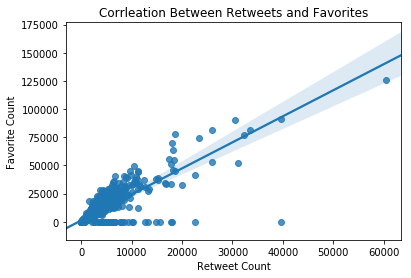

In [47]:
ax = sns.regplot(x="retweet_count", y="favorite_count", data=tweets_df);
ax.set(title = "Corrleation Between Retweets and Favorites", xlabel = 'Retweet Count', ylabel = 'Favorite Count');

### Dog Breeds

#### Was the Prediction a Breed of Dog?

Let's take a look at the prediction algorithm. How many times did the algorithm predict a breed of dog?

True     4581
False    1641
dtype: int64

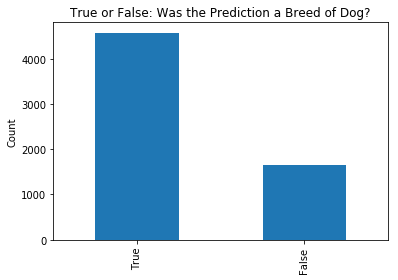

In [48]:
df1 = pd.concat([tweets_df.p1_dog,tweets_df.p2_dog, tweets_df.p3_dog])
display(df1.value_counts())
ax = pd.value_counts(df1).plot.bar()
ax.set(title="True or False: Was the Prediction a Breed of Dog?", ylabel = 'Count');

#### Confidence Levels

What is the average confidence level of the predictions?

In [49]:
avg_conf = ((tweets_df.p1_conf.sum() + tweets_df.p2_conf.sum() + tweets_df.p3_conf.sum()) /
            (tweets_df.p1_conf.count() + tweets_df.p2_conf.count() + tweets_df.p3_conf.count()))
avg_conf

0.26320290536738733

Were any of the predictions more confident than the others?

##### `p1` Confidence

In [50]:
tweets_df.p1_conf.mean()

0.5946789132111867

##### `p2` Confidence

In [51]:
tweets_df.p2_conf.mean()

0.13460979663129835

##### `p3` Confidence

In [52]:
tweets_df.p3_conf.mean()

0.06032000625967743

The most confident preidictions came from `p1_conf`. I will use `p1` to find some information about the predicted breeds in this dataset.

To begin,  create `dogs_df` to use only rows where `p1` truly predicted a breed of dog.

In [53]:
dogs_df = tweets_df[tweets_df.p1_dog]

#### Most Commonly Predicted Dog Breeds
The most commonly predicted dog breeds for `p1`:

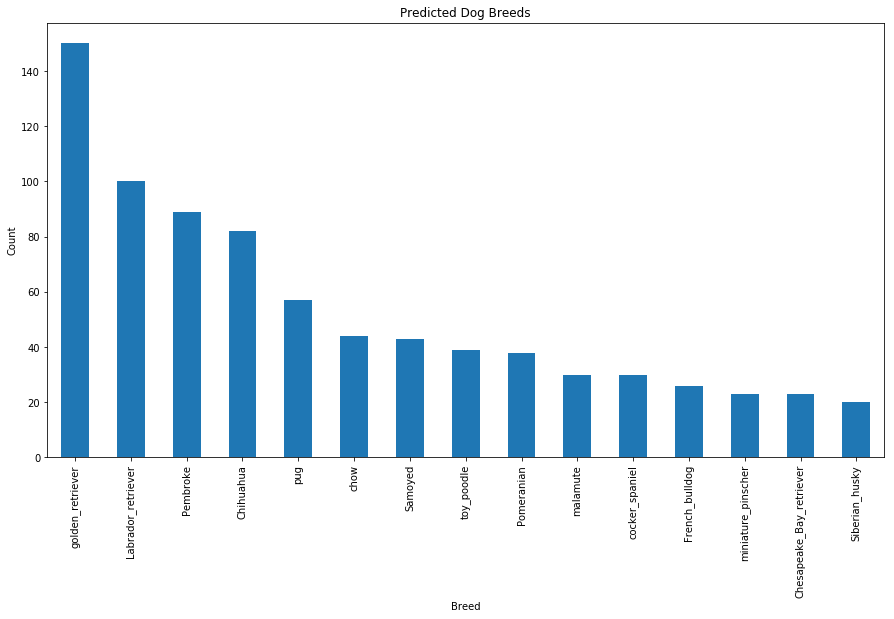

In [54]:
fig = plt.figure(figsize=(15,8))
ax = dogs_df.p1.value_counts().sort_values(ascending=False).nlargest(15).plot(kind='bar')
ax.set(title = 'Predicted Dog Breeds', xlabel="Breed", ylabel="Count");

#### Highest Rated Dogs

Use `rating_numerator` to get a sense of the highest rated dogs.

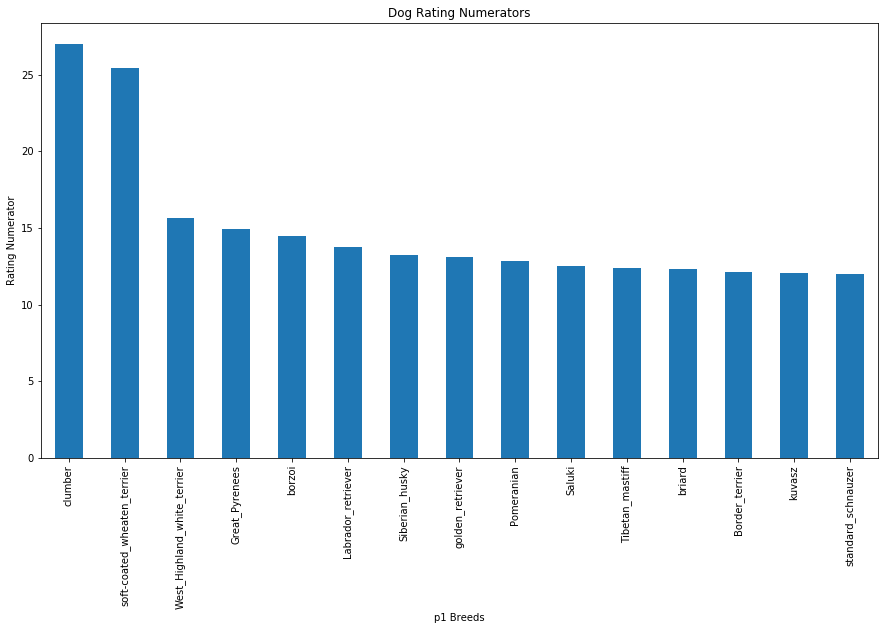

In [55]:
fig = plt.figure(figsize=(15,8))
ax = dogs_df.groupby('p1')['rating_numerator'].mean().sort_values(ascending=False).nlargest(15).plot(kind='bar')
ax.set(title="Dog Rating Numerators", xlabel="p1 Breeds", ylabel="Rating Numerator");